/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


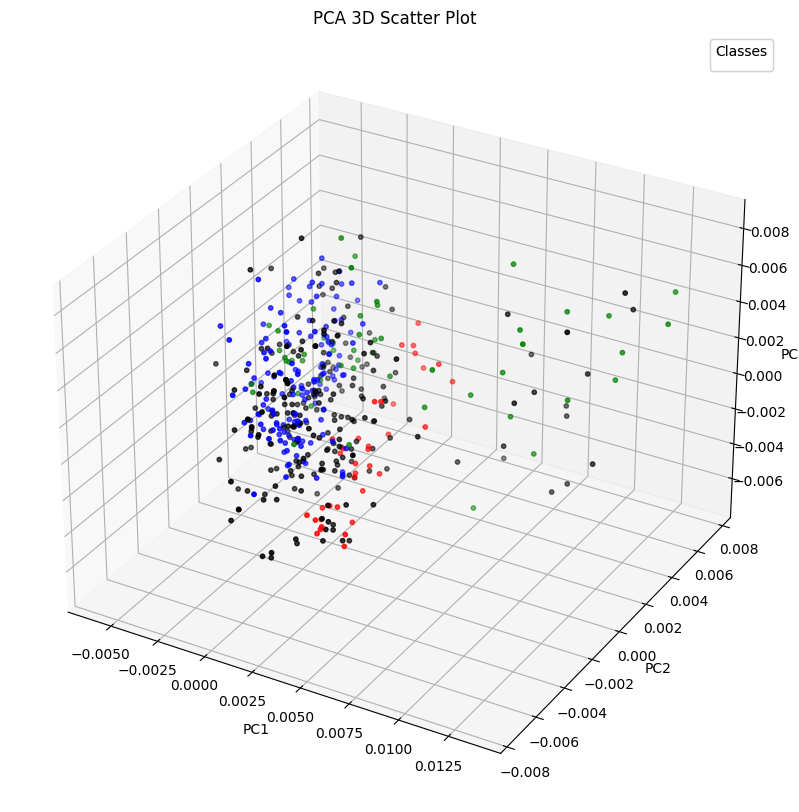

In [ ]:
from google.colab import drive

# Mount Google Drive
# drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the dataset (example using the Iris dataset)
file_path = 'elbow_avg_output_sample0_structure.csv'
data = pd.read_csv(file_path)
label_column = '1'
X = data.drop(columns=[label_column,'0','1.1'])
y = data[label_column]
labels = ['0', '1', '2', '3']

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the principal components and the labels
df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df['label'] = y

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
color_mapping = {0: 'k', 1: 'g', 2: 'b', 3: 'r'}
colors = np.array([color_mapping[label] for label in y])
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors, s=10)

# Add labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a color bar
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

plt.title('PCA 3D Scatter Plot')
plt.show()